In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random

# ignore all warnings
import warnings
warnings.filterwarnings("ignore")


# import data
train_set= pd.read_csv('./Data/train.csv', index_col= 'id')
test_set= pd.read_csv('./Data/test.csv', index_col= 'id')


In [332]:
# store all duplicated columns
duplicated_cols_dict= {}
duplicated_cols_list_full = []


# THIS FUNCTION is to drop all duplicates columns
for i, col in enumerate(train_set.columns):
    duplicated_cols_list= []
    # if the col is already one of the keys
    # then skip
    if col in duplicated_cols_list_full:
        continue
    for c in train_set.columns:
        if (train_set[col].equals(train_set[c])):
            duplicated_cols_list.append(c)
            duplicated_cols_list_full.append(c)
        
           
    if (len(duplicated_cols_list) > 1):
        duplicated_cols_dict[col] = duplicated_cols_list   

In [333]:
from matplotlib.cbook import flatten

# determine duplicated columns to drop
drop_cols = set(list(flatten(list(duplicated_cols_dict.values())))) - set(duplicated_cols_dict.keys())

In [334]:
# drop the duplicates

train_set= train_set.drop(drop_cols, axis= 1)
test_set= test_set.drop(drop_cols, axis= 1)

In [5]:
cols_Vincent = train_set.columns[:int(len(train_set.columns)/2)]
cols_Duong = train_set.columns[int(len(train_set.columns)/2):]

Text(0.5, 1.0, 'Percentages of missing values in each column')

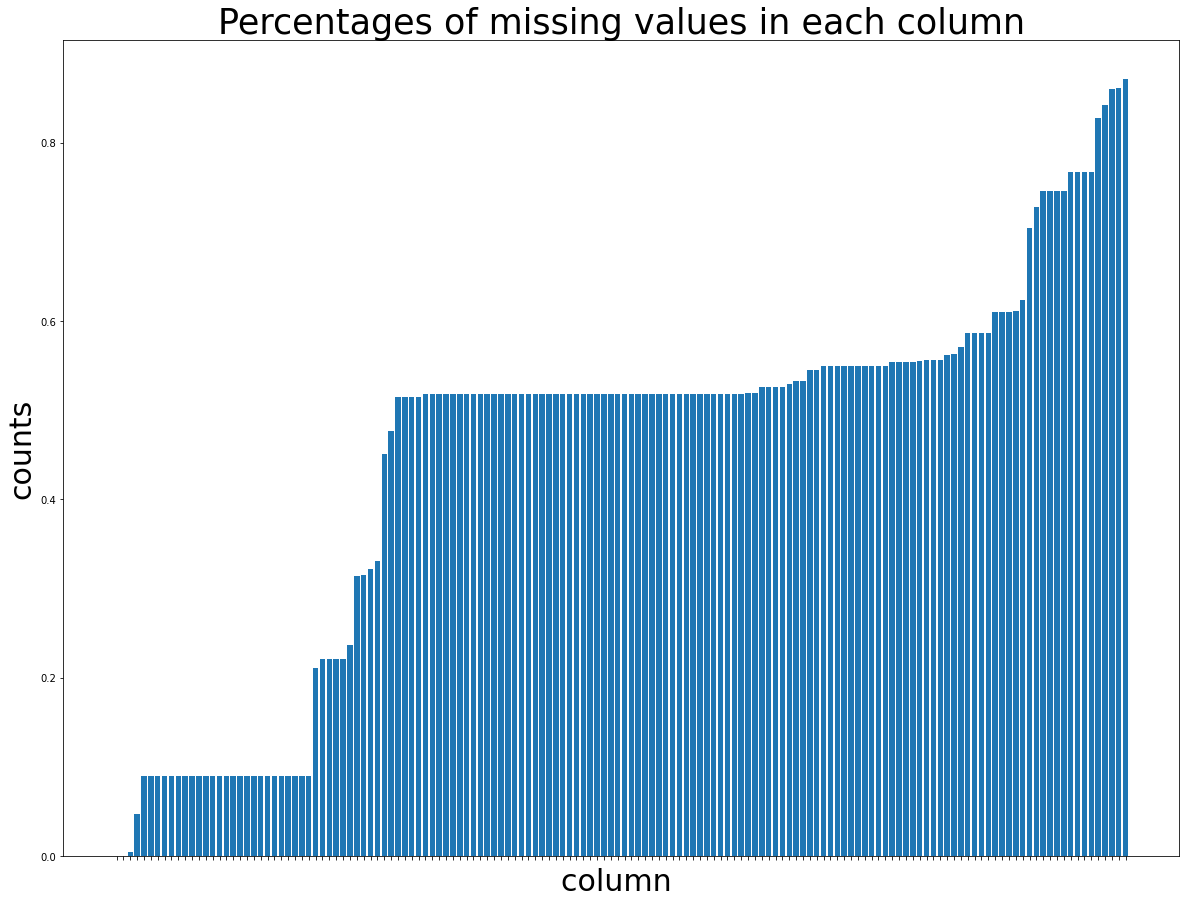

In [6]:
na_counts= train_set.isna().sum().sort_values()
fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(train_set)

ax.bar(na_counts.index,na_counts.values/total_samples)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("counts", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Percentages of missing values in each column", fontsize= 35)

In [7]:
train_set.describe()

,label,Field_3,Field_10,Field_13,Field_19,Field_20,Field_21,Field_22,Field_23,Field_27,...,partner4_L,partner5_A,partner5_D,partner5_G,num_of_phone,Field_78,Field_79,Field_80,Field_81,Field_82
count,53030.000000,25564.000000,25564.000000,25564.0,25564.000000,2.556400e+04,25564.000000,25564.000000,25564.000000,2.556400e+04,...,48283.000000,48283.000000,48283.000000,48283.000000,50518.000000,36397.00000,27782.000000,36320.000000,35981.000000,53030.000000
mean,0.316726,1.538687,1.096542,1.0,0.267022,3.603181e+06,4.485331,0.999452,31.472540,2.252840e+05,...,0.306464,0.254334,0.000124,0.000041,1.087236,20.80144,30.911307,-1.793163,-32.149412,1.668659
std,0.465204,0.498511,0.332593,0.0,0.835968,2.282034e+06,0.281697,0.053069,46.238001,8.423081e+05,...,0.461030,0.435491,0.011147,0.006436,0.297815,40.10993,35.968215,32.176041,63.442452,1.090910
min,0.000000,1.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,-267.00000,0.000000,-267.000000,-290.000000,1.000000
25%,0.000000,1.000000,1.000000,1.0,0.000000,1.490000e+06,4.500000,1.000000,1.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,4.00000,5.326888,-5.600000,-69.000000,1.000000
50%,0.000000,2.000000,1.000000,1.0,0.000000,3.801000e+06,4.500000,1.000000,14.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,16.00000,15.556349,2.086957,0.000000,1.000000
75%,1.000000,2.000000,1.000000,1.0,0.000000,4.500000e+06,4.500000,1.000000,40.000000,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,1.000000,36.00000,46.013087,9.500000,1.000000,2.000000
max,1.000000,2.000000,5.000000,1.0,6.864000,2.980000e+07,6.000000,2.000000,464.000000,2.000000e+07,...,1.000000,1.000000,1.000000,1.000000,5.000000,242.00000,325.976226,238.000000,238.000000,4.000000


In [8]:
print ("Labels count")
train_set.label.value_counts()

Labels count


0    36234
1    16796
Name: label, dtype: int64

Text(0.5, 1.0, 'Correlation with labels')

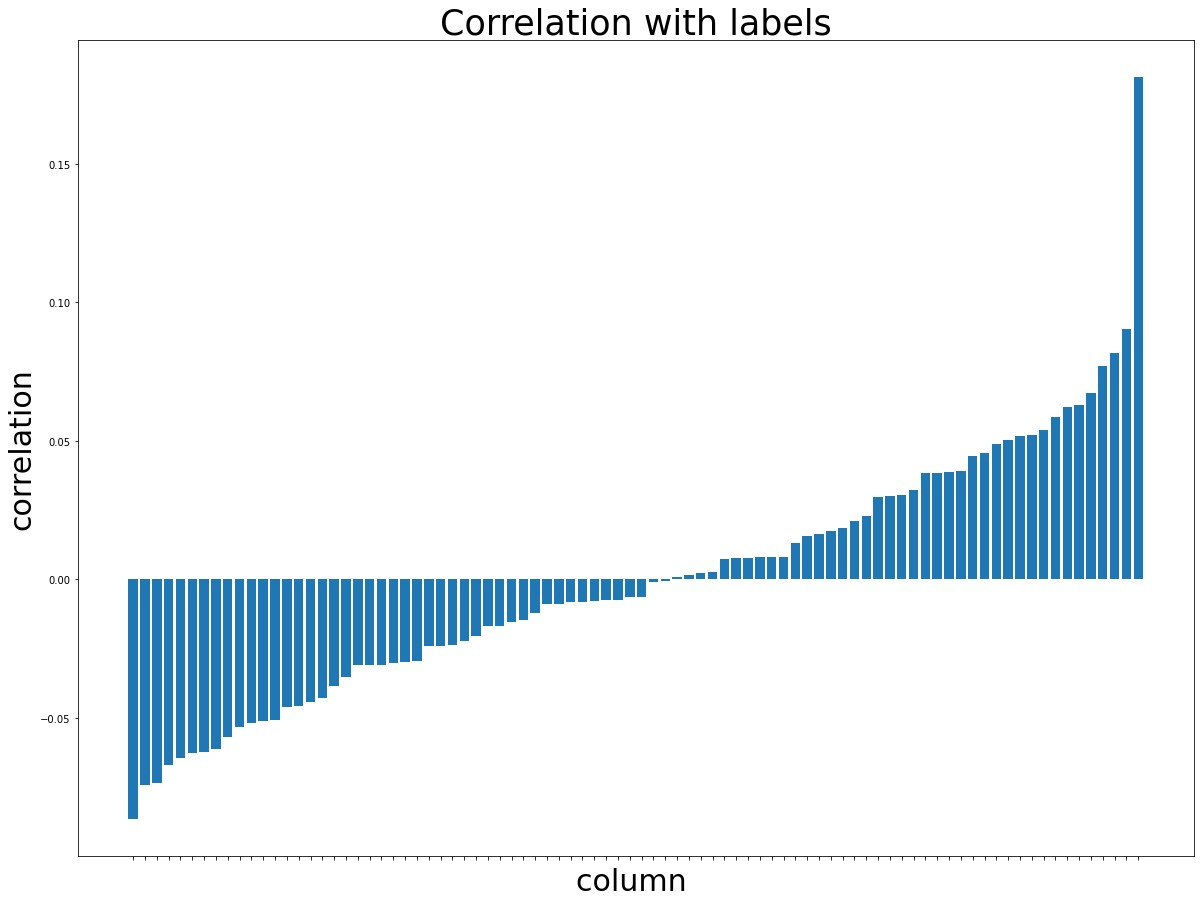

In [9]:
corrs = train_set.corr()['label'].sort_values()
# exclude nan corrs
corrs = corrs[corrs.values < 1]

fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(train_set)

ax.bar(corrs.index,corrs.values)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("correlation", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Correlation with labels", fontsize= 35)

## Duong's part

In [273]:
data_Duong = train_set[cols_Duong].copy()

data_Duong['label']= train_set['label'].values

In [11]:
data_Duong.head()

,info_social_sex,subscriberCount,currentLocationLocationId,currentLocationLatitude,currentLocationLongitude,homeTownLocationId,homeTownLatitude,homeTownLongitude,data.basic_info.locale,currentLocationCity,...,partner5_D,partner5_G,brief,num_of_phone,Field_78,Field_79,Field_80,Field_81,Field_82,label
id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,cb1,1.0,NaN,NaN,NaN,NaN,1,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,4,1.0,NaN,NaN,NaN,NaN,1,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1,1.0,33.0,10.769445,6.466667,0.0,2,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1.0,33.0,10.769445,6.466667,0.0,3,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1.0,33.0,10.769445,6.466667,0.0,3,1


Text(0.5, 1.0, 'Percentages of missing values in each column')

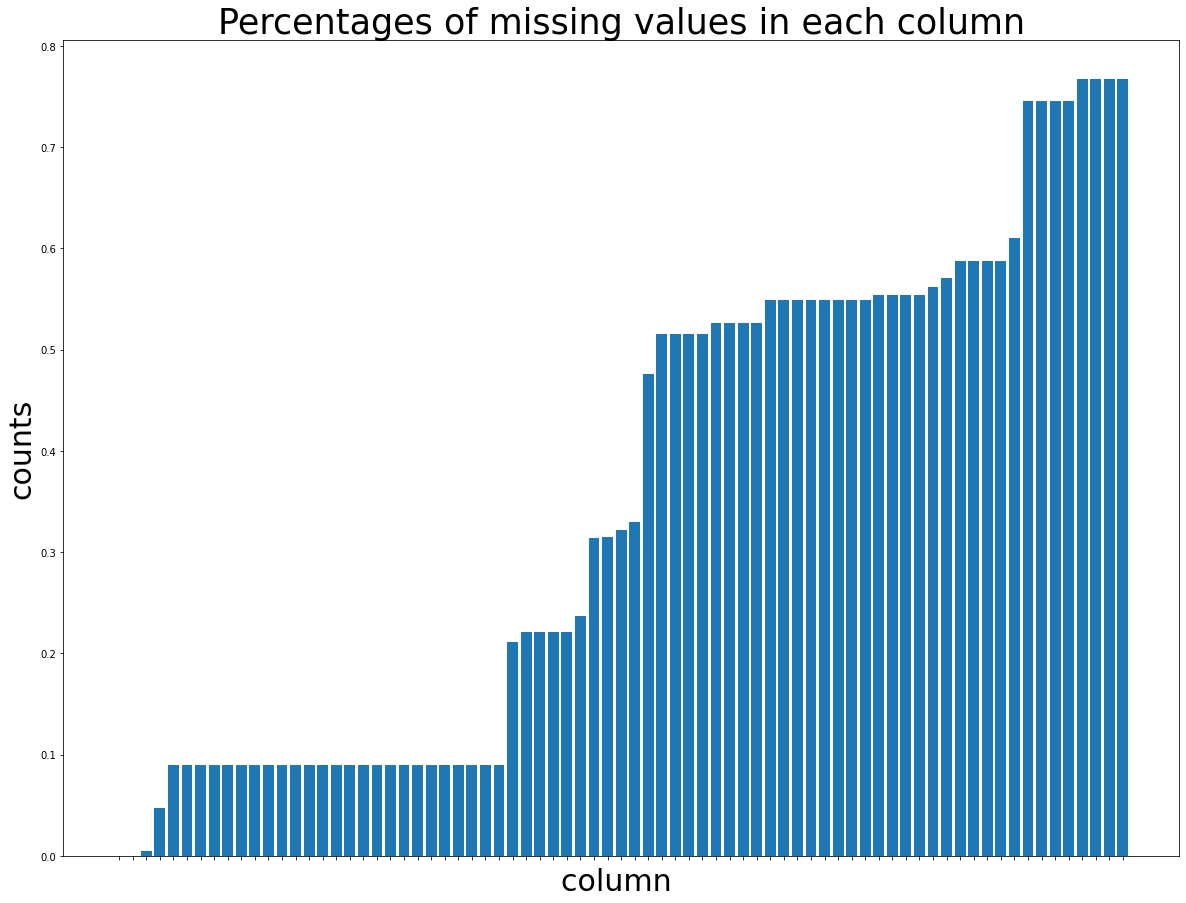

In [12]:
na_counts= data_Duong.isna().sum().sort_values()
fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(data_Duong)

ax.bar(na_counts.index,na_counts.values/total_samples)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("counts", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Percentages of missing values in each column", fontsize= 35)

Text(0.5, 1.0, 'Correlation with labels')

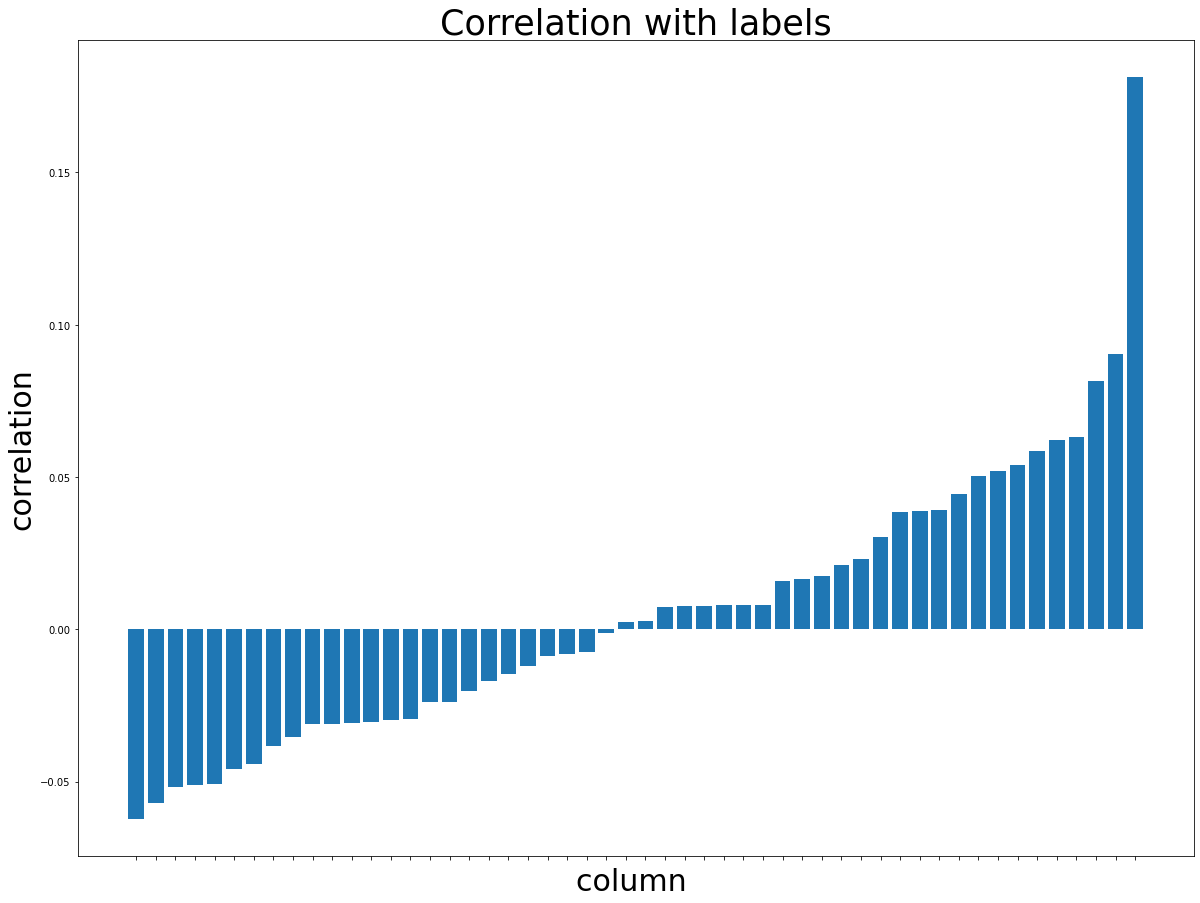

In [13]:
corrs = data_Duong.corr()['label'].sort_values()
# exclude nan corrs
corrs = corrs[corrs.values < 1]

fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(data_Duong)

ax.bar(corrs.index, corrs.values)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("correlation", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Correlation with labels", fontsize= 35)

In [15]:
pd.crosstab(data_Duong['label'],\
            data_Duong['homeTownCountry'], dropna= False)

homeTownCountry,Angola,Bangladesh,Cambodia,China,Czech Republic,Democratic Republic of the Congo,France,Germany,Hong Kong,India,...,South Africa,South Korea,Spain,Taiwan,Thailand,United Arab Emirates,United Kingdom,United States,Venezuela,Vietnam
label,,,,,,,,,,,,,,,,,,,,,
0,0,1,3,9,1,7,5,1,3,0,...,0,15,2,1,4,3,8,29,1,9096
1,1,0,1,9,1,1,1,0,7,1,...,1,6,0,1,2,5,4,8,0,3058


### Drop columns about geological info

In [490]:
useless_cols = ['currentLocationLocationId', 'currentLocationLatitude', 'currentLocationLongitude', \
                'homeTownLocationId', 'homeTownLatitude', 'homeTownLongitude', 'data.basic_info.locale', \
                'currentLocationCity', 'currentLocationCountry', 'currentLocationName', 'currentLocationState', \
                'homeTownCity', 'homeTownCountry',  'homeTownName', 'homeTownState']
data_Duong.drop(useless_cols, axis= 1, inplace= True)

In [491]:
for i, col in enumerate(data_Duong.columns):
    print (i+1, "/ Column name:", col)
    print(data_Duong[col].value_counts(dropna=False))

1 / Column name: info_social_sex
NaN       29779
male      13775
female     9476
Name: info_social_sex, dtype: int64
2 / Column name: subscriberCount
0.000000       31997
13.000000         35
47.000000         30
30.000000         29
65.000000         28
               ...  
3430.696782        1
263.796733         1
3328.185096        1
177.655633         1
2987.579463        1
Name: subscriberCount, Length: 16993, dtype: int64
3 / Column name: topFriends
NaN    32364
5.0    11696
1.0     3339
2.0     2401
3.0     1828
4.0     1402
Name: topFriends, dtype: int64
4 / Column name: numOrg
2.0     7800
3.0     7693
4.0     6565
1.0     6524
0.0     5613
5.0     4967
NaN     4753
6.0     3499
7.0     2333
8.0     1365
9.0      864
10.0     523
11.0     279
12.0     142
13.0      60
14.0      27
15.0      14
16.0       6
17.0       2
19.0       1
Name: numOrg, dtype: int64
5 / Column name: F_numOrg
NaN    27914
1.0    20414
2.0     3922
3.0      672
4.0      101
5.0        6
6.0        1
Nam

### For info_social_sex column:

In [54]:
label_by_info_social_sex = data_Duong.groupby(['label'])\
                ['info_social_sex'].value_counts()
df = pd.DataFrame(label_by_info_social_sex).rename({'info_social_sex':'counts'}, axis=1).reset_index()

### Female has a slightly higher chance of having label 0.
### For the existing values, there are more male than female customers.

Text(0.5, 1.0, 'pct of Info social sex by label')

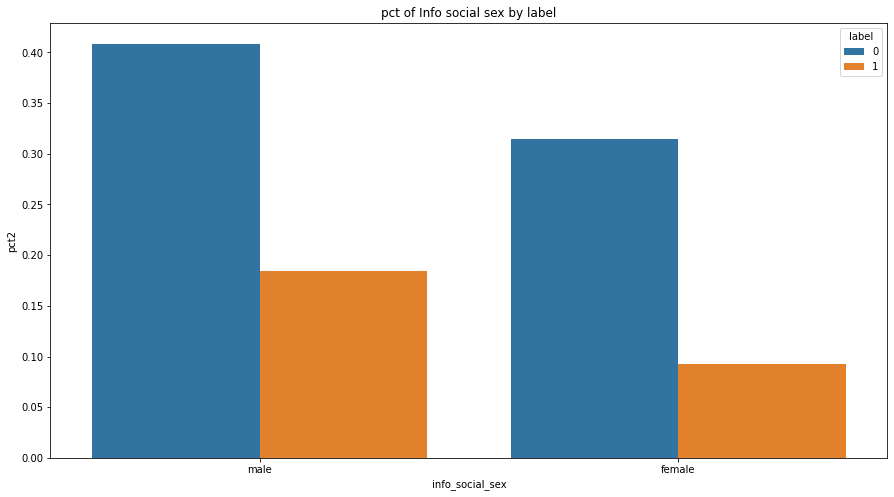

In [127]:
df['pct2'] = df['counts']/df['counts'].sum()
import seaborn as sns

fig, ax = plt.subplots(figsize= (15,8))
sns.barplot(x= 'info_social_sex', y = 'pct2', \
            hue= 'label', data= df, ax=ax)

ax.set_title("pct of Info social sex by label")

In [202]:
print ("percentages of male and female in column info_social_sex:")
info_social_sex_pct_original = data_Duong.info_social_sex.value_counts()/data_Duong.info_social_sex.value_counts().sum()
info_social_sex_pct_original

percentages of male and female in column info_social_sex:


male      0.592448
female    0.407552
Name: info_social_sex, dtype: float64

### We'll fill in missing values with 60% male and 40% female

In [259]:
random.seed(1976)

info_social_sex_random = random.choice(info_social_sex_pct_original.index,\
                                       size= len(data_Duong),\
                                       p= info_social_sex_pct_original.values)
#data_Duong = train_set[cols_Duong].copy()
data_Duong['info_social_sex'] = np.where(data_Duong['info_social_sex'].isnull(),\
            info_social_sex_random,\
            data_Duong['info_social_sex'])

In [261]:
print ("After filling all NAs...")
data_Duong['info_social_sex'].value_counts()/data_Duong['info_social_sex'].value_counts().sum()

After filling all NAs...


male      0.592137
female    0.407863
Name: info_social_sex, dtype: float64

## subscriberCount column
### Plot its distributions

### A lot of missing values

In [278]:
data_Duong.subscriberCount.value_counts(dropna= False)

NaN       29130
0.0       18335
13.0         35
47.0         30
30.0         29
          ...  
1817.0        1
1056.0        1
620.0         1
1220.0        1
796.0         1
Name: subscriberCount, Length: 1526, dtype: int64

## If subscriberCount > 60,000 then label = 0
## We can use it as a factor to automatically fill in label later


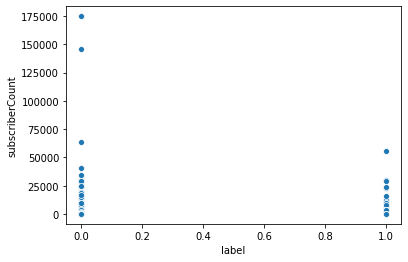

In [277]:
sns.scatterplot(data_Duong.label, data_Duong.subscriberCount)

### it seems like the more subsciber counts, the more likely its label will be 0

Text(0.5, 0.98, 'box plots of labels based on subscriberCount')

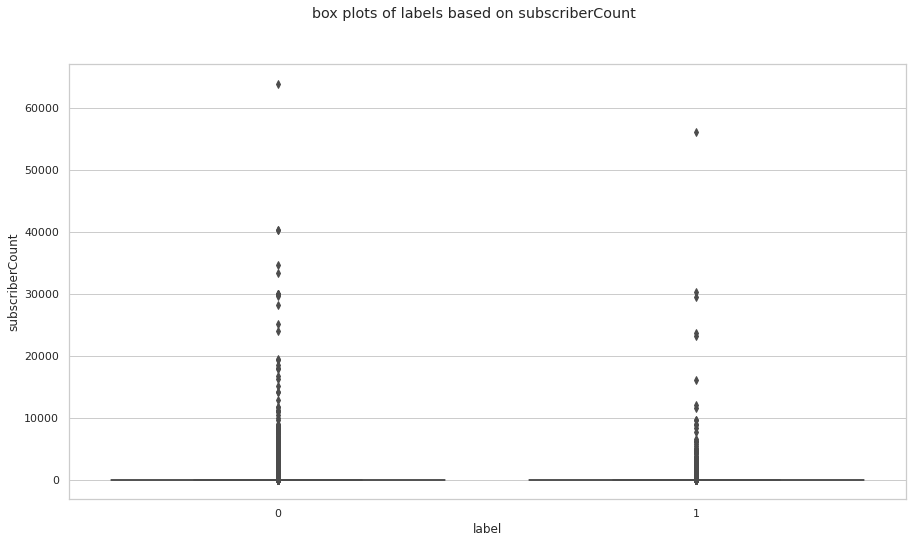

In [358]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15,8)

sns.boxplot(x= 'label', y= 'subscriberCount', data= data_Duong[data_Duong.subscriberCount <100000])
plt.suptitle("box plots of labels based on subscriberCount")

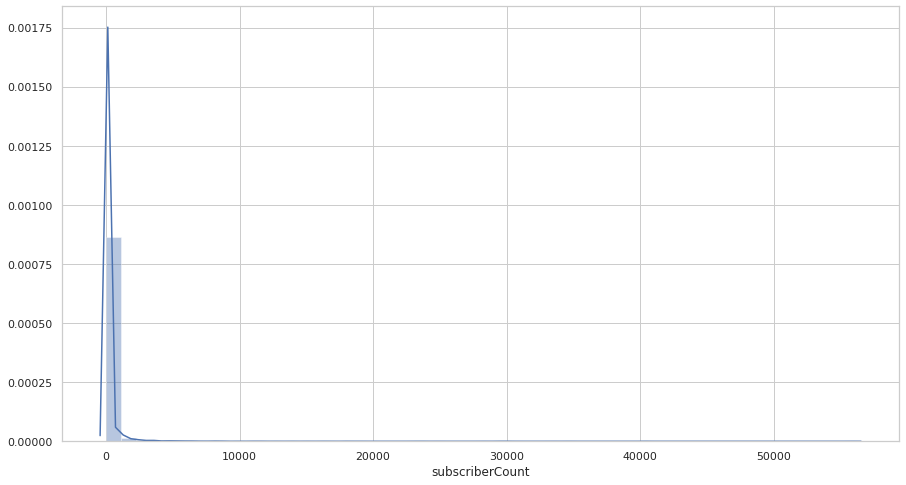

In [298]:
sns.distplot(data_Duong[data_Duong.subscriberCount < 60000].subscriberCount)

In [368]:
print ("General stats data_Duong.subscriberCount")
print ("median   ", data_Duong.subscriberCount.median())
print (data_Duong.subscriberCount.describe())

General stats data_Duong.subscriberCount
median    0.0
count     23900.000000
mean        189.071046
std        2203.631422
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      174916.000000
Name: subscriberCount, dtype: float64


## Fill in NAs of subscriberCount with mean and std


In [375]:
subscriberCount_random = data_Duong.subscriberCount.mean() + \
                    data_Duong.subscriberCount.std()*np.random.randn(len(data_Duong))
subscriberCount_random = np.where(subscriberCount_random <0, 0, subscriberCount_random)

In [376]:
data_Duong['subscriberCount'] = np.where(data_Duong['subscriberCount'].isnull(), \
                                         subscriberCount_random,
                                         data_Duong['subscriberCount'])

In [484]:
train_set[train_set.Field_36 =='SV'][['Field_36', 'Field_56', 'Field_65', 'maCv']]

,Field_36,Field_56,Field_65,maCv
id,,,,
8,SV,Học sinh sinh viên,NaN,NaN
185,SV,Học sinh sinh viên,Vùng 1,NaN
208,SV,Sinh viên,Vùng 2,NaN
216,SV,Sinh viên,Vùng 2,NaN
229,SV,Học sinh sinh viên,Vùng 1,NaN
...,...,...,...,...
51405,SV,Sinh viên,Vùng 1,NaN
51460,SV,Sinh viên,Vùng 1,NaN
51831,SV,Sinh viên,Vùng 1,NaN


In [489]:
train_set.brief.value_counts()

0           13704
1           11682
2            8106
notfound     5016
3            4551
2cy          2271
4            1900
1cy          1740
3cy          1323
cb1           838
4cy           603
5             553
5cy           188
cb2           117
6              90
6cy            53
7cy            19
7              14
cb3             5
8               5
Name: brief, dtype: int64

In [443]:
train_set[train_set.Field_42 != train_set.Field_41][['Field_42', 'Field_41']]

,Field_42,Field_41
id,,
1,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
9,NaN,NaN
...,...,...
53022,NaN,NaN
53024,NaN,NaN
53026,NaN,NaN


In [442]:
df2 = train_set[train_set.Field_42 != train_set.Field_41][['Field_42', 'Field_41']].dropna()

df2

,Field_42,Field_41
id,,
131,0.0,1.0
457,0.0,1.0
996,0.0,1.0
1147,0.0,1.0
1214,0.0,1.0
...,...,...
52182,0.0,1.0
52267,0.0,1.0
52699,0.0,1.0


In [420]:
train_set.groupby('label').Field_36.value_counts()[0]/train_set.Field_36.value_counts()

B3    0.833333
BT    0.592593
CB    0.750000
CH    0.853448
CK    0.600000
CN    0.615385
CY    1.000000
DK    0.645418
DN    0.717758
DT    0.632850
GB    0.614232
GD    0.674002
HC    0.816117
HD    0.750000
HG    0.400000
HK    0.500000
HN    0.563492
HS    0.789474
HT    0.950000
HX    0.666667
KC    0.500000
NN    0.791667
NO    0.750000
SV    0.775000
TA    0.892857
TC    0.833333
TE    0.857143
TK    0.861111
TN    0.732479
TS    0.500000
XD    0.686747
XK    0.739130
XN    1.000000
XV         NaN
Name: Field_36, dtype: float64

In [419]:
train_set.groupby('label').Field_36.value_counts()[1]/train_set.Field_36.value_counts()

B3    0.166667
BT    0.407407
CB    0.250000
CH    0.146552
CK    0.400000
CN    0.384615
CY         NaN
DK    0.354582
DN    0.282242
DT    0.367150
GB    0.385768
GD    0.325998
HC    0.183883
HD    0.250000
HG    0.600000
HK    0.500000
HN    0.436508
HS    0.210526
HT    0.050000
HX    0.333333
KC    0.500000
NN    0.208333
NO    0.250000
SV    0.225000
TA    0.107143
TC    0.166667
TE    0.142857
TK    0.138889
TN    0.267521
TS    0.500000
XD    0.313253
XK    0.260870
XN         NaN
XV    1.000000
Name: Field_36, dtype: float64

In [413]:
train_set.Field_36.value_counts()

DN    15221
GD     4862
HC     1365
TN     1327
CH      812
SV      320
GB      267
DK      251
CN      208
DT      207
HN      126
XK      115
XD       83
NN       72
TK       72
HS       57
HX       42
TA       28
BT       27
HT       20
HD       16
KC       12
TS        8
CB        8
TE        7
TC        6
B3        6
HG        5
CK        5
NO        4
HK        2
XV        1
XN        1
CY        1
Name: Field_36, dtype: int64

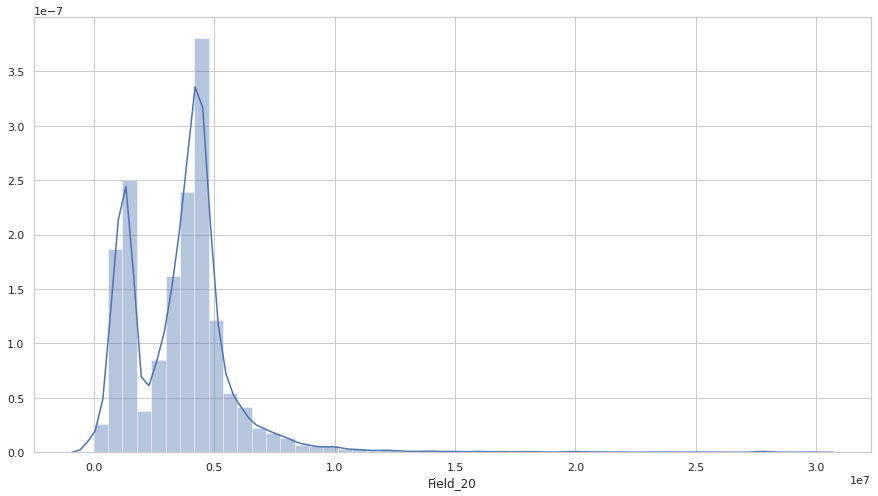

In [392]:
sns.distplot(train_set.Field_20)

In [399]:
train_set.Field_21.value_counts()

4.5    25372
0.0       89
6.0       60
3.0       43
Name: Field_21, dtype: int64

In [388]:
train_set.groupby('label').Field_4.value_counts()

label  Field_4
0      T1         9508
       GH         8826
1      T1         4370
       GH         2860
Name: Field_4, dtype: int64

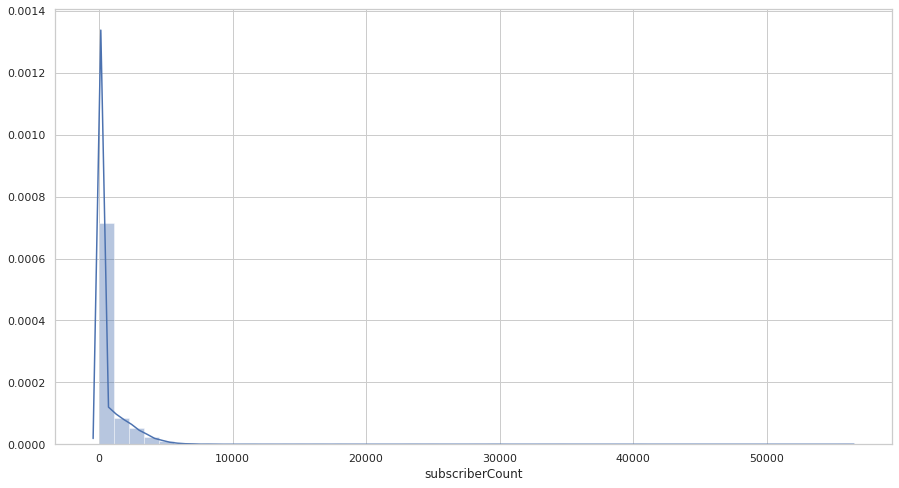

In [378]:
sns.distplot(data_Duong[data_Duong.subscriberCount < 60000].subscriberCount)

# create custom columns

### column diff_start_end_date = diff between E_startDate and E_endDate

In [401]:
from datetime import datetime

data_Duong['E_endDate'] = data_Duong['E_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['E_startDate'] = data_Duong['E_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))


data_Duong['F_endDate'] = data_Duong['F_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['F_startDate'] = data_Duong['F_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['G_startDate'] = data_Duong['G_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['G_endDate'] = data_Duong['G_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))               


data_Duong['A_endDate'] = data_Duong['A_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['A_startDate'] = data_Duong['A_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))               

## *letter*_diff_date = diff between *letter*_startDate and *letter*_endDate

In [410]:
data_Duong[['E_endDate', 'F_endDate']]

,E_endDate,F_endDate
id,,
0,1900-01-01,1900-01-01
1,1900-01-01,1900-01-01
2,2019-09-11,2019-08-18
3,1900-01-01,1900-01-01
4,1900-01-01,1900-01-01
...,...,...
53025,2019-12-31,2019-12-31
53026,1900-01-01,1900-01-01
53027,1900-01-01,1900-01-01


In [409]:
train_set.Field_1

id
0        2019-07-24T03:39:02.854Z
1                             NaN
2        2019-01-17T07:15:26.367Z
3                             NaN
4                             NaN
                   ...           
53025    2019-12-24T15:39:31.156Z
53026                         NaN
53027    2017-11-11T17:15:01.948Z
53028                         NaN
53029                         NaN
Name: Field_1, Length: 53030, dtype: object

In [403]:
data_Duong['E_diff_date']= data_Duong['E_endDate'] - data_Duong['E_startDate']

data_Duong['F_diff_date']= data_Duong['F_endDate'] - data_Duong['F_startDate']

data_Duong['G_diff_date']= data_Duong['G_endDate'] - data_Duong['G_startDate']

data_Duong['A_diff_date']= data_Duong['A_endDate'] - data_Duong['A_startDate']

In [19]:
E_diff_date_counts = data_Duong['E_diff_date'].value_counts()

In [20]:
E_diff_date_counts

0 days      45026
1 days        446
2 days        255
3 days        213
31 days       205
            ...  
178 days        1
199 days        1
186 days        1
170 days        1
185 days        1
Name: E_diff_date, Length: 185, dtype: int64

TypeError: the dtypes of parameters x (timedelta64[ns]) and width (float64) are incompatible

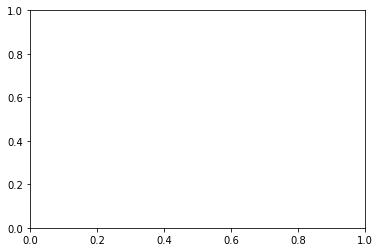

In [21]:
plt.bar(E_diff_date_counts.index, E_diff_date_counts.values)

## Explore topfriends

In [ ]:
topFriends_counts

In [ ]:
train_set['E_endDate'].equals(train_set['G_endDate'])

In [ ]:
train_set[['Field_14','Field_16']].drop_duplicates()

In [ ]:
for i in range(10):
    if (i%3 == 0):
        continue
    print (i)